In [1]:
%pip  install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\muizz\anaconda3\envs\python12\lib\site-packages (1.3.2)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [56]:
import pandas as pd
df = pd.read_csv("E:\extras/diabetes.csv")
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

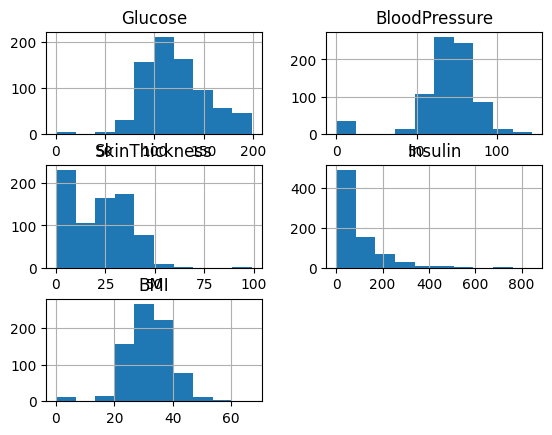

In [18]:
df.hist(column= ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"], bins = 10)

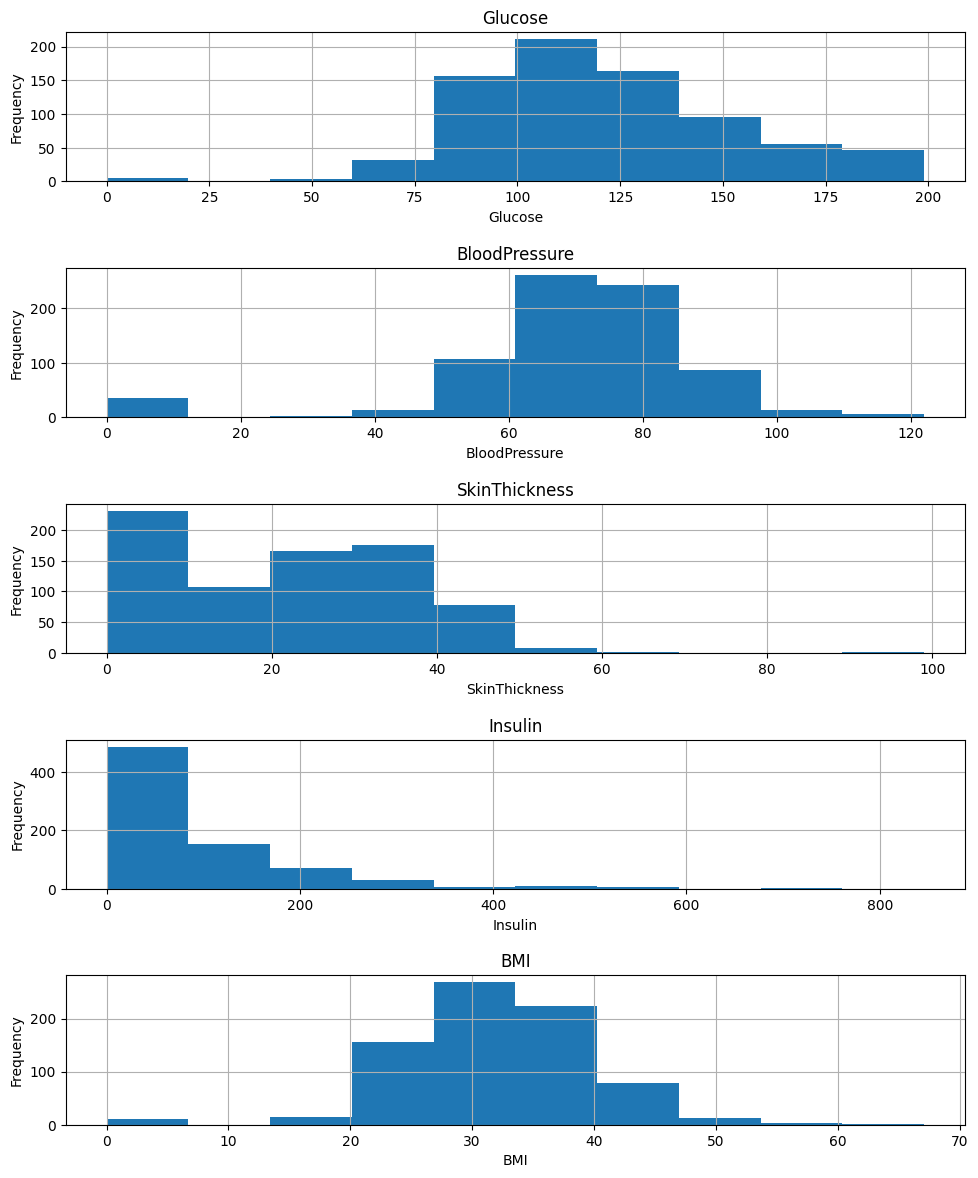

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded as `df`

columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Create individual histograms with spacing and layout adjustments
fig, axes = plt.subplots(nrows=len(columns), figsize=(10, 12))  # Adjust figsize as needed
for i, col in enumerate(columns):
    df[col].hist(ax=axes[i], bins=10)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    plt.tight_layout(pad=1.5)  # Adjust spacing between subplots

plt.show()


In [2]:
import pandas as pd
df = pd.read_csv("E:\extras/diabetes.csv")
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [7]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
x[0:3]


array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ]])

In [8]:
y = df['Insulin'].values
y[0:3]

array([0, 0, 0], dtype=int64)

## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [ ]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:3]

# Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# K nearest neighbor (KNN)
# Import library
Classifier implementing the k-nearest neighbors vote.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Predicting

In [12]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([190,   0,  44, 155, 125], dtype=int64)

In [16]:
k=7
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)


In [17]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([190,   0,  44, 155, 125], dtype=int64)

In [3]:
df = pd.read_csv("E:\extras/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df = pd.read_csv("E:\extras/KO.US_H4.csv")
df.head()

,datetime,open,high,low,close,volume
0,1998-01-02 16:00:00,66.75,67.01,65.93,66.06,1280212
1,1998-01-02 20:00:00,66.06,66.88,65.94,66.81,1096004
2,1998-01-05 16:00:00,66.81,66.87,65.87,66.13,2121527
3,1998-01-05 20:00:00,66.06,66.44,65.25,66.44,1434002
4,1998-01-06 16:00:00,65.88,66.37,65.82,66.37,1534310


In [7]:
df.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

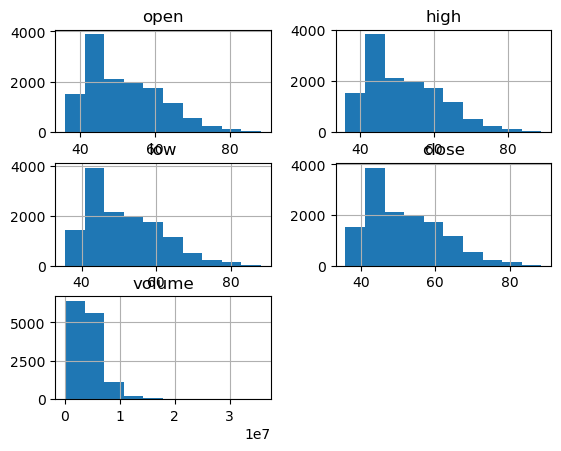

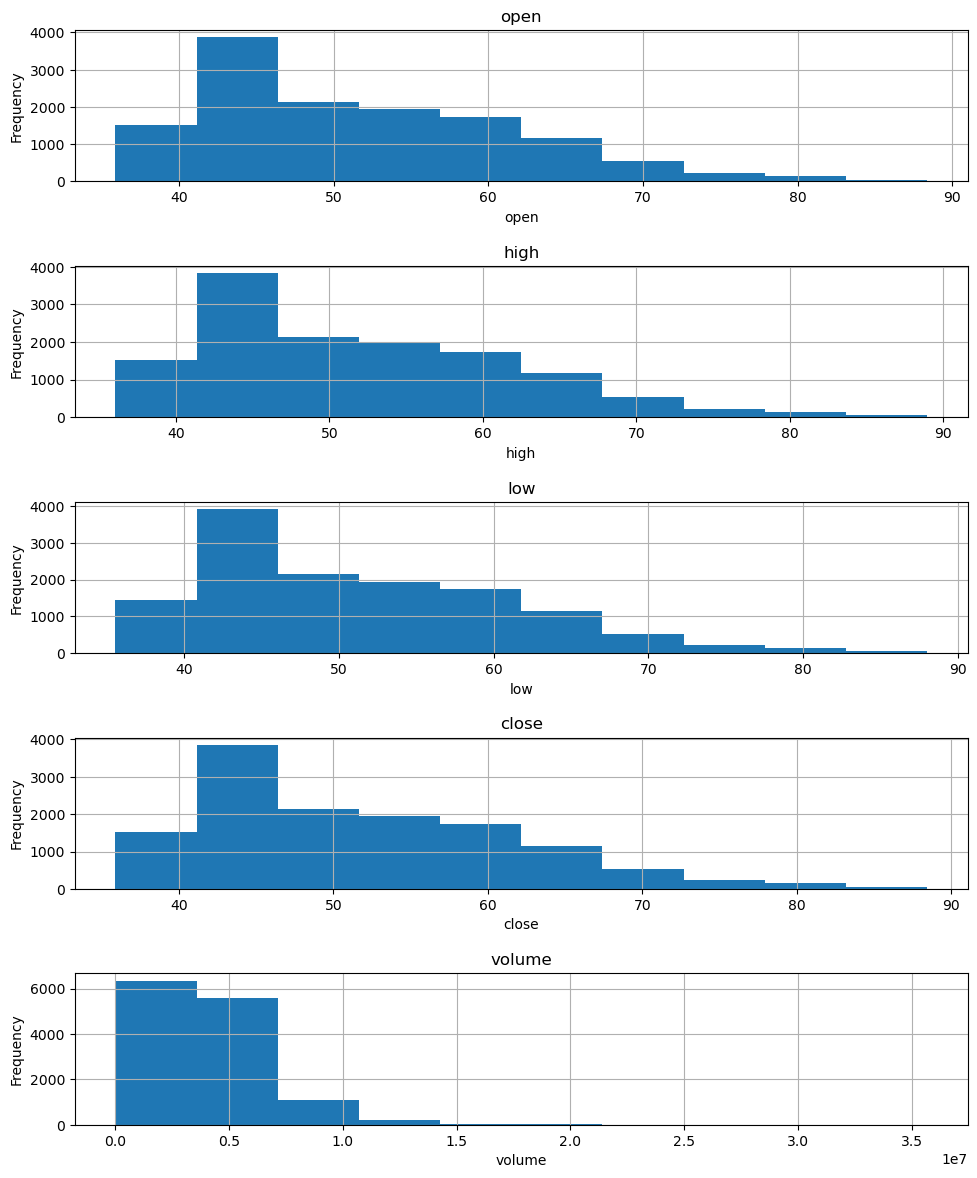

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ["open", "high", "low", "close", "volume"]
df.hist(column=columns, bins=10)
fig, axes = plt.subplots(nrows=len(columns), figsize=(10, 12))  # Adjust figsize as needed

for i, col in enumerate(columns):
    df[col].hist(ax=axes[i], bins=10)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout(pad=1.5)  # Adjust spacing between subplots
plt.show()




In [12]:
x = df[['open', 'high', 'low', 'close', 'volume']].values
x[0:3]

array([[6.675000e+01, 6.701000e+01, 6.593000e+01, 6.606000e+01,
        1.280212e+06],
       [6.606000e+01, 6.688000e+01, 6.594000e+01, 6.681000e+01,
        1.096004e+06],
       [6.681000e+01, 6.687000e+01, 6.587000e+01, 6.613000e+01,
        2.121527e+06]])

In [13]:
y = df['volume'].values
y[0:3]

array([1280212, 1096004, 2121527], dtype=int64)

In [18]:
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x.astype(int))
x[0:3]

array([[ 1.47935917,  1.54004063,  1.41779773,  1.47750571, -1.13294926],
       [ 1.47935917,  1.43859187,  1.41779773,  1.47750571, -1.2051272 ],
       [ 1.47935917,  1.43859187,  1.41779773,  1.47750571, -0.8032981 ]])

This line of code applies standardization to the data using the StandardScaler from the preprocessing module in scikit-learn. Here's a breakdown of what each part of the code does:

preprocessing.StandardScaler(): This creates an instance of the StandardScaler class, which is used for standardizing features by removing the mean and scaling to unit variance.

.fit(x): This fits the scaler to the data x. During this step, the mean and standard deviation of the data are computed and stored within the scaler.

.transform(x.astype(int)): This transforms the data x using the previously computed mean and standard deviation. The astype(int) part indicates that the data is cast to integers before applying the transformation. It's worth noting that standardization typically works with numerical data, and casting to integers might be unnecessary or even inappropriate in some cases.

x[0:3]: Finally, it prints the first three rows of the transformed data.

#  the train_test_split function from scikit-learn to split a dataset into training and testing sets. Let's break down how it works
x and y are your input features and corresponding labels.
test_size=0.3 indicates that 30% of the data will be used for testing, and the remaining 70% will be used for training.
random_state=4 is a seed for the random number generator. It ensures that the data is split in the same way every time you run the code, making the results reproducible.
# print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)
These lines print the shapes (number of rows and columns) of the training and testing sets. This is useful for checking the size of your training and testing datasets.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (9311, 5) (9311,)
Test set: (3991, 5) (3991,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
k=6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [23]:
yhat = neigh.predict(x_test)
yhat[0:10]

array([1723500, 2651200, 4430312, 3529980, 8361836, 5382351, 4687192,
       3341100, 5357907, 4915563], dtype=int64)

In [24]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.12716142197400923
Test set Accuracy:  0.0


In [27]:
import numpy as np
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.00025056, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

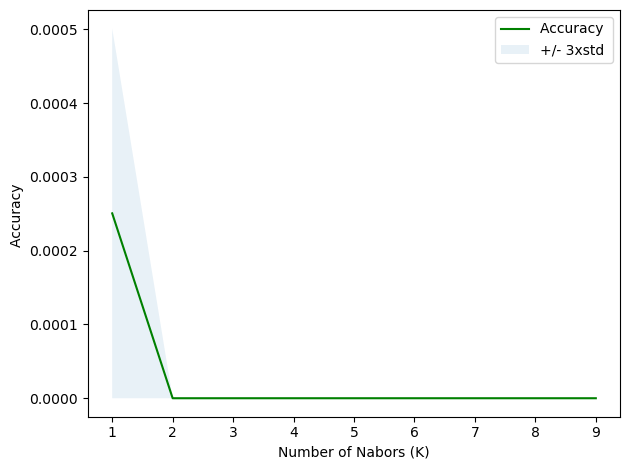

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.00025056376847907793 with k= 1


# Decision Tree

In [32]:
%pip install scikit-learn


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

# surpress warnings

In [35]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [36]:
my_data = pd.read_csv("E:\extras/diabetes.csv")
my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
x = my_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
x[0:3]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ]])

In [46]:
import numpy as np
from sklearn import preprocessing

# Assuming X is your input data
X = np.array([[6., 148., 72., 35., 0., 33.6, 0.627, 50.]])

# Initialize LabelEncoder
le_Pregnancies = preprocessing.LabelEncoder()

# Flatten and fit_transform the data for the first column
X[:, 0] = le_Pregnancies.fit_transform(X[:, 0].astype(str))


In [47]:
y = my_data['Insulin'].values
y[0:3]

array([0, 0, 0], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


In [49]:
Insulintree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Insulintree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# prediction


In [50]:
predtree = Insulintree.predict(x_test)
print (predtree [0:5])
print (y_test [0:5])

[210   0  56 180 110]
[196   0  50 170 120]


# Evaluation 

In [51]:
from sklearn import metrics
import matplotlib as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))


DecisionTrees's Accuracy:  0.5627705627705628


# visualization

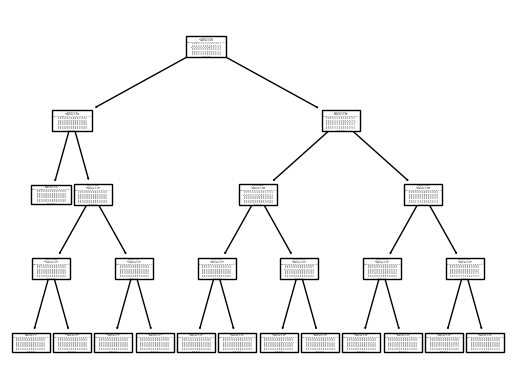

In [55]:
tree.plot_tree(Insulintree)
plt.show()
